<a href="https://colab.research.google.com/github/vincentdelory/big-data-analytics-Kaggle-Competition-H-M-Personalized-Fashion-Recommendations/blob/main/big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from datetime import datetime, date, timedelta

from collections import Counter, defaultdict
from PIL import Image
from pathlib import Path

path = Path("/content/drive/MyDrive/H&M_Project/")


In [ ]:
transactions_df = pd.read_csv(path / "transactions_train.csv", dtype = {'article_id': str})
articles_df = pd.read_csv(path / "articles.csv", dtype = {'article_id': str})
customers_df = pd.read_csv(path / "customers.csv")
submission = pd.read_csv(path / "sample_submission.csv")


In [ ]:
transactions_df["t_dat"] = pd.to_datetime(transactions_df['t_dat'])
transactions_df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [ ]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [ ]:
customers_df.isnull().sum()

,0
customer_id,0
FN,895050
Active,907576
club_member_status,6062
fashion_news_frequency,16011
age,15861
postal_code,0


<Axes: ylabel='Frequency'>

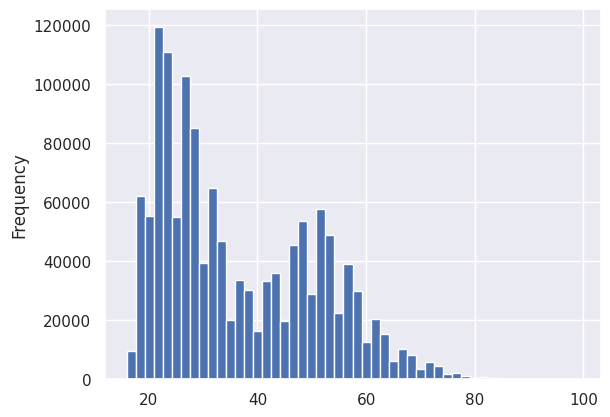

In [ ]:
customers_df["age"].plot.hist(bins=50)

In [ ]:
age_id = 0
age_group = pd.DataFrame(columns =["age","age_id"])
age=16

for i in range(53) :
    if age < 30 :
        temp_group = pd.DataFrame({"age":[age, age+1], "age_id":[age_id, age_id]})
        age_group = age_group.append(temp_group)
        age += 2
        age_id += 1
    elif  age < 60 :
        temp_group = pd.DataFrame({"age":[age, age+1, age+2, age+3, age+4],"age_id":[age_id, age_id, age_id, age_id, age_id]})
        age_group = age_group.append(temp_group)
        age += 5
        age_id += 1
    else:
        temp_group = pd.DataFrame({"age":[age], "age_id":[age_id]})
        age_group = age_group.append(temp_group)
        age += 1


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
age_id = 0
age_group = pd.DataFrame(columns =["age","age_id"])
age=16

all_temp_groups = [] # Create an empty list to store temporary DataFrames

for i in range(53) :
    if age < 30 :
        temp_group = pd.DataFrame({"age":[age, age+1], "age_id":[age_id, age_id]})
        # age_group = age_group.append(temp_group)
        all_temp_groups.append(temp_group) # Append the temporary DataFrame to the list
        age += 2
        age_id += 1
    elif  age < 60 :
        temp_group = pd.DataFrame({"age":[age, age+1, age+2, age+3, age+4],"age_id":[age_id, age_id, age_id, age_id, age_id]})
        # age_group = age_group.append(temp_group)
        all_temp_groups.append(temp_group) # Append the temporary DataFrame to the list
        age += 5
        age_id += 1
    else:
        temp_group = pd.DataFrame({"age":[age], "age_id":[age_id]})
        # age_group = age_group.append(temp_group)
        all_temp_groups.append(temp_group) # Append the temporary DataFrame to the list
        age += 1

age_group = pd.concat(all_temp_groups, ignore_index=True) # Concatenate all temporary DataFrames into age_group

In [ ]:
age_group

,age,age_id
0,16,0
1,17,0
2,18,1
3,19,1
4,20,2
...,...,...
79,95,13
80,96,13
81,97,13
82,98,13


In [ ]:
customers_df = pd.merge(customers_df, age_group, on="age", how = "left")
customers_df = customers_df.drop(["FN", "Active", "club_member_status", "fashion_news_frequency", "postal_code"], axis=1)
customers_df


,customer_id,age,age_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,10.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,4.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,4.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,11.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,11.0
...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,24.0,4.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,21.0,2.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,21.0,2.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,18.0,1.0


In [ ]:
articles_df.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
print(articles_df["index_group_name"].unique())
print(articles_df["index_group_no"].unique())

['Ladieswear' 'Baby/Children' 'Menswear' 'Sport' 'Divided']
[ 1  4  3 26  2]


In [ ]:
sex_category = articles_df[["index_group_no", "index_group_name"]].reset_index()
display(sex_category["index_group_name"].value_counts())

,count
index_group_name,
Ladieswear,39737
Baby/Children,34711
Divided,15149
Menswear,12553
Sport,3392


<function matplotlib.pyplot.show(close=None, block=None)>

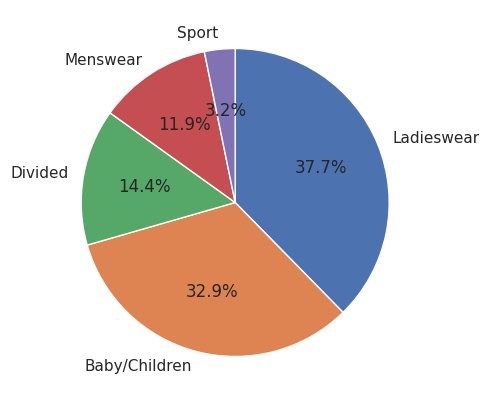

In [ ]:
sex_category_list = sex_category["index_group_name"].value_counts().index.to_list()
plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 12
plt.pie(sex_category["index_group_name"].value_counts().sort_values(ascending=False),
        labels = sex_category_list, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show

In [ ]:
del sex_category_list

In [ ]:
articles_category_df = pd.DataFrame(articles_df[["article_id", "index_group_no"]])
articles_category_df.columns = ["article_id", "sex_attribute"]
articles_category_df

,article_id,sex_attribute
0,108775015,1
1,108775044,1
2,108775051,1
3,110065001,1
4,110065002,1
...,...,...
105537,953450001,3
105538,953763001,1
105539,956217002,1
105540,957375001,2


In [ ]:
transactions_df = pd.merge(transactions_df, articles_category_df, on = "article_id", how = "left")
transactions_df

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1


In [ ]:
cust_sex = transactions_df[["customer_id", "sex_attribute", "article_id"]].groupby(["customer_id","sex_attribute"]).count().unstack()
cust_sex.columns = ["Woman", "Young", "Man", "Have-kids", "Sports-person"]
cust_sex

,Woman,Young,Man,Have-kids,Sports-person
customer_id,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,13.0,2.0,1.0,5.0,NaN
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,62.0,19.0,NaN,4.0,1.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,12.0,1.0,4.0,NaN,1.0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,NaN,NaN,NaN,NaN,2.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,11.0,NaN,NaN,NaN,2.0
...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,46.0,NaN,1.0,NaN,4.0
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,27.0,48.0,2.0,7.0,NaN
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,19.0,18.0,5.0,NaN,3.0


In [ ]:
%%time
cust_sex["attribute"] = cust_sex.apply(lambda x : list(x[x == x.max()].index), axis=1)
cust_sex


CPU times: user 5min 3s, sys: 17.5 s, total: 5min 21s
Wall time: 5min 19s


,Woman,Young,Man,Have-kids,Sports-person,attribute
customer_id,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,13.0,2.0,1.0,5.0,NaN,[Woman]
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,62.0,19.0,NaN,4.0,1.0,[Woman]
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,12.0,1.0,4.0,NaN,1.0,[Woman]
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,NaN,NaN,NaN,NaN,2.0,[Sports-person]
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,11.0,NaN,NaN,NaN,2.0,[Woman]
...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,46.0,NaN,1.0,NaN,4.0,[Woman]
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,27.0,48.0,2.0,7.0,NaN,[Young]
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,19.0,18.0,5.0,NaN,3.0,[Woman]


In [ ]:
cust_sex1 = pd.DataFrame(cust_sex[["attribute"]]).reset_index()
cust_sex1["attribute"] = cust_sex1["attribute"].apply(",".join).astype(str)
del cust_sex
cust_sex1

,customer_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,Woman
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,Woman
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,Young
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Woman
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,Young


In [ ]:
print(cust_sex1.attribute.unique())

['Woman' 'Sports-person' 'Young' 'Woman,Man' 'Have-kids' 'Woman,Young'
 'Man' 'Young,Man' 'Woman,Sports-person' 'Woman,Man,Sports-person'
 'Woman,Young,Sports-person' 'Woman,Young,Man' 'Man,Sports-person'
 'Woman,Have-kids' 'Young,Have-kids' 'Young,Sports-person' 'Man,Have-kids'
 'Woman,Man,Have-kids' 'Young,Man,Sports-person' 'Have-kids,Sports-person'
 'Woman,Young,Man,Sports-person' 'Woman,Young,Have-kids'
 'Woman,Have-kids,Sports-person' 'Woman,Man,Have-kids,Sports-person'
 'Young,Have-kids,Sports-person' 'Young,Man,Have-kids'
 'Woman,Young,Man,Have-kids' 'Man,Have-kids,Sports-person'
 'Woman,Young,Have-kids,Sports-person' 'Young,Man,Have-kids,Sports-person'
 'Woman,Young,Man,Have-kids,Sports-person']


In [ ]:
cust_sex1.loc[~((cust_sex1["attribute"] == "Woman") |
               (cust_sex1["attribute"] == "Young")  |
               (cust_sex1["attribute"] == "Man")    |
               (cust_sex1["attribute"] == "Have-kids") |
               (cust_sex1["attribute"] == "Sports-person")), "attribute"] = "Woman"
cust_sex1

,customer_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,Woman
...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,Woman
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,Young
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Woman
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,Young


In [ ]:
print(cust_sex1.attribute.unique())

['Woman' 'Sports-person' 'Young' 'Have-kids' 'Man']


<function matplotlib.pyplot.show(close=None, block=None)>

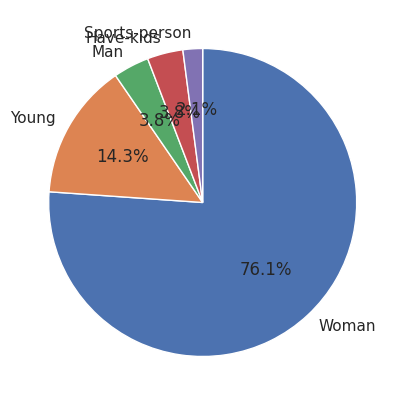

In [ ]:
temp = cust_sex1["attribute"].value_counts().index.to_list()
plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 12
plt.pie(cust_sex1["attribute"].value_counts().sort_values(ascending=False),
        labels = temp, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show

In [ ]:
print(cust_sex1["attribute"].value_counts().sort_values(ascending=False))

attribute
Woman            1036847
Young             194984
Man                51281
Have-kids          51128
Sports-person      28041
Name: count, dtype: int64


In [ ]:
customers_df = pd.merge(customers_df, cust_sex1, on ="customer_id", how="left")
customers_df

,customer_id,age,age_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,10.0,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,4.0,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,4.0,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,11.0,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,11.0,Woman
...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,24.0,4.0,Woman
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,21.0,2.0,Young
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,21.0,2.0,Woman
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,18.0,1.0,Young


In [ ]:
customers_df.isnull().sum()

,0
customer_id,0
age,15861
age_id,15861
attribute,9699


In [ ]:
customers_df["attribute"].fillna("Woman", inplace = True)

<ipython-input-31-8861f425f5b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df["attribute"].fillna("Woman", inplace = True)


In [ ]:
customers_df["attribute"] = customers_df["attribute"].fillna("Woman")


In [ ]:
age_mean = customers_df[["age", "attribute"]].groupby("attribute").mean().round().reset_index()
age_mean.columns = ["attribute", "age_mean"]
age_mean

,attribute,age_mean
0,Have-kids,41.0
1,Man,39.0
2,Sports-person,37.0
3,Woman,37.0
4,Young,33.0


In [ ]:
customers_df = pd.merge(customers_df, age_mean, on = "attribute", how ="left")
customers_df.loc[(customers_df["age"].isnull()), "age"] = customers_df["age_mean"]
customers_df = customers_df.drop(["age_mean", "age_id"], axis =1)
customers_df = pd.merge(customers_df, age_group, on="age", how="left")
customers_df.isnull().sum()

,0
customer_id,0
age,0
attribute,0
age_id,0


In [ ]:
transactions_df = pd.merge(transactions_df, customers_df, on ="customer_id", how ="left")
transactions_df.isnull().sum()


,0
t_dat,0
customer_id,0
article_id,0
price,0
sales_channel_id,0
sex_attribute,0
age,0
attribute,0
age_id,0


In [ ]:
del cust_sex1

In [ ]:
transactions_df = transactions_df.loc[transactions_df.t_dat >= pd.to_datetime('2020-09-15')] # changed from 2020-09-01
transactions_df

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,attribute,age_id
31521960,2020-09-15,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,794321007,0.061000,2,26,24.0,Woman,4
31521961,2020-09-15,00040239317e877c77ac6e79df42eb2633ad38fcac09fc...,875272011,0.050831,2,2,50.0,Woman,11
31521962,2020-09-15,00040239317e877c77ac6e79df42eb2633ad38fcac09fc...,875272012,0.050831,2,2,50.0,Woman,11
31521963,2020-09-15,000749135ee9aa3a24c2316ea5ae4f495b39c1653c5612...,800691007,0.011847,2,1,29.0,Woman,6
31521964,2020-09-15,000749135ee9aa3a24c2316ea5ae4f495b39c1653c5612...,800691007,0.011847,2,1,29.0,Woman,6
...,...,...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2,32.0,Woman,7
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2,32.0,Woman,7
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,1,67.0,Woman,13
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1,21.0,Woman,2


In [ ]:
transactions_df.article_id = ' ' + transactions_df.article_id.astype('str')
temp = transactions_df.groupby(['age_id','attribute','article_id'])['customer_id'].agg('count').reset_index()
temp.columns = ['age_id','attribute','article_id','count']
transactions_df = transactions_df.merge(temp, on=['age_id','attribute','article_id'], how='left')
transactions_df

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,attribute,age_id,count
0,2020-09-15,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,794321007,0.061000,2,26,24.0,Woman,4,6
1,2020-09-15,00040239317e877c77ac6e79df42eb2633ad38fcac09fc...,875272011,0.050831,2,2,50.0,Woman,11,2
2,2020-09-15,00040239317e877c77ac6e79df42eb2633ad38fcac09fc...,875272012,0.050831,2,2,50.0,Woman,11,7
3,2020-09-15,000749135ee9aa3a24c2316ea5ae4f495b39c1653c5612...,800691007,0.011847,2,1,29.0,Woman,6,16
4,2020-09-15,000749135ee9aa3a24c2316ea5ae4f495b39c1653c5612...,800691007,0.011847,2,1,29.0,Woman,6,16
...,...,...,...,...,...,...,...,...,...,...
266359,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2,32.0,Woman,7,10
266360,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2,32.0,Woman,7,4
266361,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,1,67.0,Woman,13,2
266362,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1,21.0,Woman,2,3


In [ ]:
transactions_df = transactions_df.sort_values(['count','t_dat'],ascending=False)
transactions_df = transactions_df.drop_duplicates(['age_id','attribute','article_id'])
transactions_df

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,attribute,age_id,count
235816,2020-09-22,112a0940cfd3aef99e3ac744c7e7e6abf1fff78fe2fecc...,924243001,0.038119,1,1,24.0,Woman,4,124
239383,2020-09-22,2d03c6d196714f5aa53d6ab096c2d65452676c6640c991...,918522001,0.042356,1,1,20.0,Woman,2,109
233552,2020-09-22,009b11e116c9e8c992a1e556cc6949276e8cae80b9f708...,930380001,0.033881,2,1,60.0,Woman,13,104
234000,2020-09-22,03ebf9f036a4451119f082b050514b19adb8e8aa6d4fe4...,924243001,0.042356,1,1,26.0,Woman,5,102
234225,2020-09-22,05aaecf35099e27c75da17b17fb512ecb8c1ecc4cc4053...,924243001,0.042356,1,1,22.0,Woman,3,99
...,...,...,...,...,...,...,...,...,...,...
26043,2020-09-15,ffe1791c9c6e3df9aafeebc77cf2cf03dd0123ac76ef90...,862104018,0.050169,2,26,45.0,Man,10,1
26046,2020-09-15,ffe41634ff990908faacbb465063e027e7c39499f8dfc1...,411569001,0.010153,1,3,21.0,Woman,2,1
26049,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,853316001,0.008458,1,1,36.0,Woman,8,1
26050,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,296366006,0.000847,1,1,36.0,Woman,8,1


In [ ]:
recommend_sex_age = pd.DataFrame(transactions_df.groupby(["age_id", "attribute"]).article_id.sum().reset_index())
recommend_sex_age["len"] = recommend_sex_age["article_id"].apply(lambda x : len(x))
recommend_sex_age

,age_id,attribute,article_id,len
0,0,Man,699755083 685813003 730570031 685814063 78370...,430
1,0,Sports-person,866731001 870548001 856270002 918292001 85404...,100
2,0,Woman,448509014 865799006 456163086 751471001 68581...,6230
3,0,Young,715624001 767423001 682550002 448509014 57299...,3280
4,1,Have-kids,896101002 769102052 768205011 854793001 59454...,80
...,...,...,...,...
64,13,Have-kids,857347002 750481010 806131001 916866001 76284...,290
65,13,Man,763988003 763988011 841383003 636207011 75147...,2250
66,13,Sports-person,804992017 805000001 804992034 794321007 86882...,600
67,13,Woman,930380001 924243001 751471043 865799006 92424...,42290


In [ ]:
recommend_sex_age["article_id"] = recommend_sex_age["article_id"].str.strip()
recommend_sex_age["article_id"] = recommend_sex_age["article_id"].str[:131]
recommend_sex_age = recommend_sex_age.drop(["len"], axis =1)


In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/H&M_Project/sample_submission.csv")

In [ ]:
# Ensure 'customer_id' columns are of the same type
submission["customer_id"] = submission["customer_id"].astype(str)
customers_df["customer_id"] = customers_df["customer_id"].astype(str)

# Merge the dataframes
submission = pd.merge(submission, customers_df, on="customer_id", how="left")

# Merge with recommend_sex_age
submission = pd.merge(submission, recommend_sex_age, on=["age_id", "attribute"], how="left")

# Drop unnecessary columns
submission = submission.drop(["age", "age_id", "attribute"], axis=1)

# Rename columns
submission.columns = ["customer_id", "prediction"]

# Save the submission file
submission.to_csv("submission.csv", index=False)

# Display the result
submission


,customer_id,prediction
0,789,NaN
1,12,NaN


from matplotlib import pyplot as plt
import seaborn as sns
submission.groupby('customer_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('customer_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['customer_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='index', y='customer_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
recommend_sex_age.loc[(recommend_sex_age["age_id"]==7), ]

,age_id,attribute,article_id
34,7,Have-kids,852748005 852748006 881133001 828812001 846181...
35,7,Man,685816001 763275002 598755001 598755003 598755...
36,7,Sports-person,866731001 791587001 805000001 902507001 852584...
37,7,Woman,924243001 909370001 906352001 923758001 865799...
38,7,Young,935541001 706016003 788575004 772902001 711053...
